Dataset Shape: (200, 4)
Missing Values:
 Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64
Duplicates: 0
Data Types:
 Customer ID       int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object
Summary Statistics:
        Customer ID        Age  Annual Income  Spending Score
count   200.000000  200.00000     200.000000      200.000000
mean    100.500000   43.42500   86952.155000       50.635000
std      57.879185   14.94191   40939.384144       30.093018
min       1.000000   18.00000   17368.000000        1.000000
25%      50.750000   31.00000   49740.000000       24.000000
50%     100.500000   43.50000   89293.500000       49.500000
75%     150.250000   56.00000  124832.750000       76.000000
max     200.000000   69.00000  149508.000000      100.000000


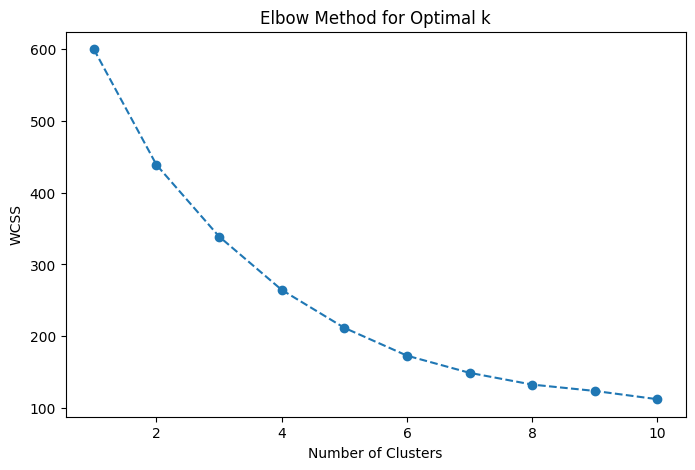

For k=2, Silhouette Score=0.2549
For k=3, Silhouette Score=0.2631
For k=4, Silhouette Score=0.2901
For k=5, Silhouette Score=0.3150
For k=6, Silhouette Score=0.3297
For k=7, Silhouette Score=0.3213
For k=8, Silhouette Score=0.3167
For k=9, Silhouette Score=0.3019
For k=10, Silhouette Score=0.2993


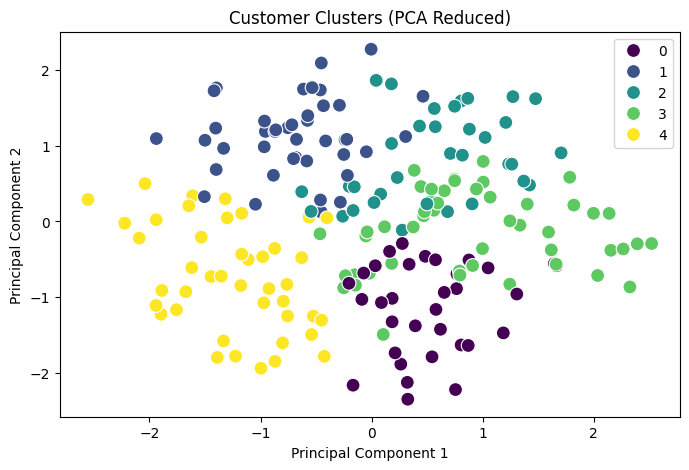

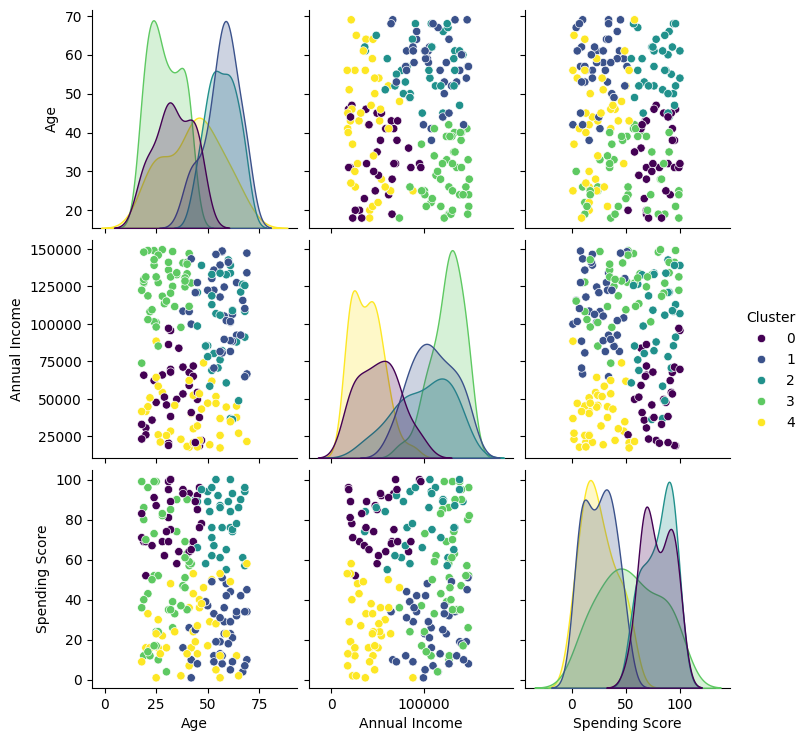

Cluster 0 Insights:
Average Age: 33.411764705882355
Average Annual Income: 51458.17647058824
Average Spending Score: 79.02941176470588
--------------------------------------
Cluster 1 Insights:
Average Age: 56.88095238095238
Average Annual Income: 109885.52380952382
Average Spending Score: 25.11904761904762
--------------------------------------
Cluster 2 Insights:
Average Age: 56.82857142857143
Average Annual Income: 99628.5142857143
Average Spending Score: 80.34285714285714
--------------------------------------
Cluster 3 Insights:
Average Age: 29.25531914893617
Average Annual Income: 125491.08510638298
Average Spending Score: 53.638297872340424
--------------------------------------
Cluster 4 Insights:
Average Age: 42.76190476190476
Average Annual Income: 39061.47619047619
Average Spending Score: 25.047619047619047
--------------------------------------
Clustered dataset saved as customer_segmented_data.csv


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Step 1: Load the Dataset
df = pd.read_csv("customer_data.csv")

# Inspect dataset
print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())
print("Data Types:\n", df.dtypes)
print("Summary Statistics:\n", df.describe())

# Step 2: Data Preprocessing
features = ["Age", "Annual Income", "Spending Score"]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Step 3: Determine Optimal Number of Clusters
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Silhouette Score for Cluster Evaluation
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f'For k={k}, Silhouette Score={score:.4f}')

# Step 4: Apply K-Means Clustering
optimal_k = 5  # Choose based on the elbow method/silhouette score
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Step 5: Visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Clusters (PCA Reduced)')
plt.legend()
plt.show()

# Pair Plot
sns.pairplot(df, hue='Cluster', vars=features, palette='viridis')
plt.show()

# Step 6: Recommendations
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    print(f"Cluster {i} Insights:")
    print("Average Age:", cluster_data['Age'].mean())
    print("Average Annual Income:", cluster_data['Annual Income'].mean())
    print("Average Spending Score:", cluster_data['Spending Score'].mean())
    print("--------------------------------------")

# Save Clustered Dataset
df.to_csv("customer_segmented_data.csv", index=False)
print("Clustered dataset saved as customer_segmented_data.csv")
